In [4]:
## Student Performance Visualization Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
## Data Loading

In [2]:
data = pd.read_csv('student_performance.csv')

In [6]:
## Data Overview

In [4]:
data.head()

,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade
0,1,18.5,95.6,3.8,97.9,A
1,2,14.0,80.0,2.5,83.9,B
2,3,19.5,86.3,5.3,100.0,A
3,4,25.7,70.2,7.0,100.0,A
4,5,13.4,81.9,6.9,92.0,A


In [5]:
data.tail()

,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade
999995,999996,18.0,95.5,4.8,100.0,A
999996,999997,15.7,82.7,6.7,88.3,A
999997,999998,14.2,85.1,5.8,87.9,A
999998,999999,25.3,90.0,5.3,100.0,A
999999,1000000,18.3,84.6,4.1,100.0,A


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   student_id               1000000 non-null  int64  
 1   weekly_self_study_hours  1000000 non-null  float64
 2   attendance_percentage    1000000 non-null  float64
 3   class_participation      1000000 non-null  float64
 4   total_score              1000000 non-null  float64
 5   grade                    1000000 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 45.8+ MB


In [7]:
data.describe()

,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,500000.500000,15.029127,84.711046,5.985203,84.283845
std,288675.278933,6.899431,9.424143,1.956421,15.432969
min,1.000000,0.000000,50.000000,0.000000,9.400000
25%,250000.750000,10.300000,78.300000,4.700000,73.900000
50%,500000.500000,15.000000,85.000000,6.000000,87.500000
75%,750000.250000,19.700000,91.800000,7.300000,100.000000
max,1000000.000000,40.000000,100.000000,10.000000,100.000000


In [2]:
## Matplotlib Visualizations

In [3]:
filtered_df = data[data['total_score'] < 100]

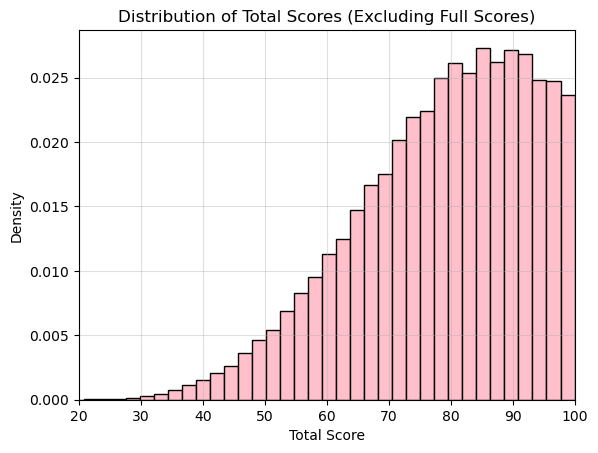

In [41]:
plt.hist(filtered_df['total_score'], bins= 40 , edgecolor = 'black', color = 'pink',  density = True)
plt.title('Distribution of Total Scores (Excluding Full Scores)')
plt.xlabel('Total Score')
plt.xlim(20, 100)
plt.ylabel('Density')
plt.grid(True, alpha = 0.4)
plt.show()

In [4]:
avg_score_by_grade = data.groupby('grade')['total_score'].mean()

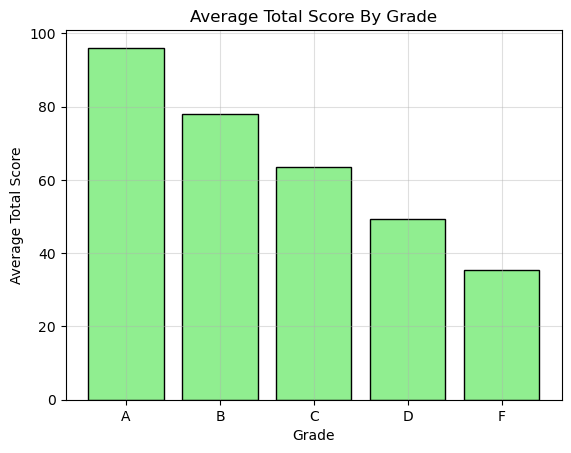

In [68]:
plt.bar(avg_score_by_grade.index, avg_score_by_grade.values, color = 'lightgreen', edgecolor = 'black')
plt.title('Average Total Score By Grade')
plt.xlabel('Grade')
plt.ylabel('Average Total Score')
plt.grid(True, alpha = 0.4)
plt.show()

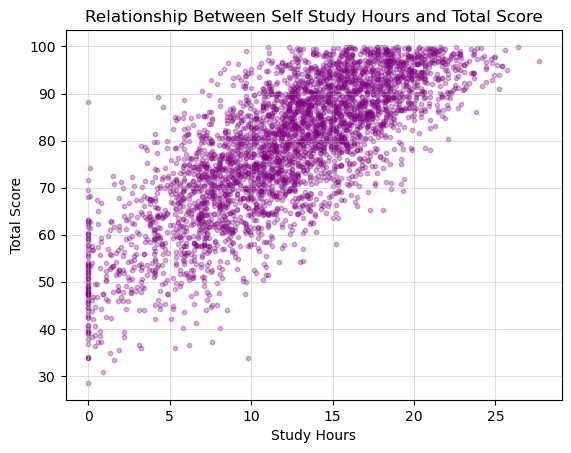

In [5]:
sample_df = data.sample(5000, random_state=42)
filtered_sample = sample_df[sample_df['total_score'] < 100]

plt.scatter(filtered_sample['weekly_self_study_hours'], filtered_sample['total_score'], s = 10, alpha = 0.3, color = 'purple')
plt.title('Relationship Between Self Study Hours and Total Score')
plt.xlabel('Study Hours')
plt.ylabel('Total Score')
plt.grid(True, alpha = 0.4)
plt.show()

In [3]:
## Seaborn Visualizations

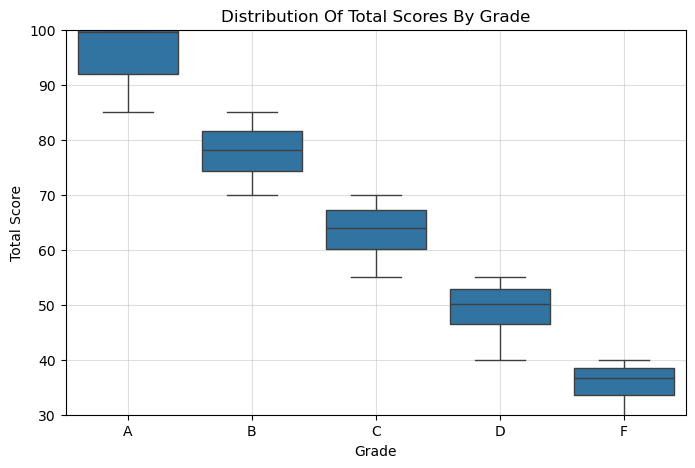

In [4]:
plt.figure(figsize = (8,5))
sns.boxplot(x = 'grade', y = 'total_score', data = data, width = 0.8)
plt.ylim(30 , 100)
plt.title('Distribution Of Total Scores By Grade')
plt.xlabel('Grade')
plt.ylabel('Total Score')
plt.grid(True, alpha = 0.4)
plt.show()

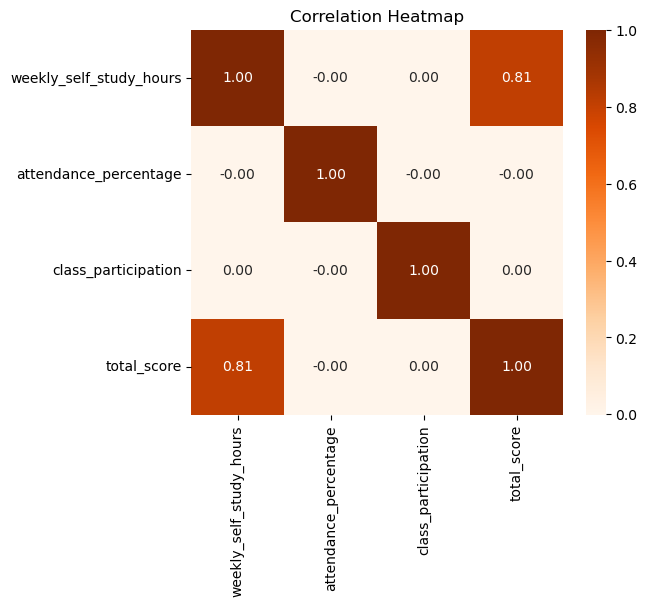

In [30]:
plt.figure(figsize = (6, 5))
sns.heatmap(data[['weekly_self_study_hours','attendance_percentage','class_participation','total_score']].corr(), annot = True, cmap = 'Oranges', fmt = '.2f')
plt.title('Correlation Heatmap')
plt.show()

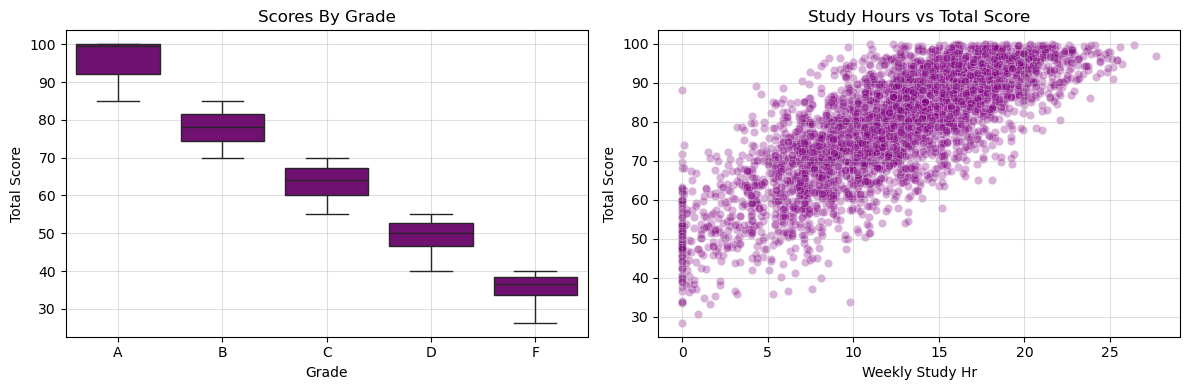

In [31]:
fig, axes = plt.subplots(1 , 2, figsize = (12, 4))

# Left : Boxplot (Grade vs Score)
sns.boxplot(x = 'grade', y = 'total_score', data = data, ax = axes[0], showfliers = False, color = 'purple')
axes[0].grid(True, alpha = 0.4)
axes[0].set_title('Scores By Grade')
axes[0].set_xlabel('Grade')
axes[0].set_ylabel('Total Score')

# Right : Scatter (Study Hours vs Score)
sample_df = data.sample(5000, random_state = 42)
filtered_sample = sample_df[sample_df['total_score'] < 100]

sns.scatterplot(
    x = 'weekly_self_study_hours',
    y = 'total_score',
    data = filtered_sample,
    alpha = 0.3,
    ax = axes[1],
    color = 'purple'
)
axes[1].grid(True, alpha = 0.4)
axes[1].set_title('Study Hours vs Total Score')
axes[1].set_xlabel('Weekly Study Hr')
axes[1].set_ylabel('Total Score')

plt.tight_layout()
plt.show()